In [25]:
# ==============================
# 1. Importar librerías
# ==============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ==============================
# 2. Cargar datos
# ==============================
df = pd.read_csv("C:/Users/ÁlvaroZB/Desktop/Porros, Farlopa y una Pistola/Materiales/caso1_semiconductores.csv")
df.head()




,material_id,formula,band_gap,formation_energy_per_atom,energy_above_hull,density,nsites,volume,crystal_system,spacegroup_number,...,frac_Ir,frac_Pt,frac_Au,frac_Hg,frac_Tl,frac_Pb,frac_Bi,is_semiconductor,is_photovoltaic,is_stable
0,mp-11107,Ac2O3,3.5226,-3.737668,0.000000,9.109130,5,91.511224,Trigonal,164,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,False,True
1,mp-32800,Ac2S3,2.2962,-2.493064,0.000000,6.535149,40,1118.407852,Tetragonal,122,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,False,True
2,mp-977351,Ac2S3,3.0275,-2.440364,0.052700,5.562971,10,328.464893,Trigonal,167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,False,True
3,mp-867311,AcAgTe2,0.0794,-0.996232,0.253251,7.997421,4,122.518406,Cubic,225,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False
4,mp-1183115,AcAlO3,4.1024,-3.690019,0.000000,8.728230,5,57.451413,Cubic,221,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False,True


In [11]:
print("Tamaño del dataset:", df.shape)
print("\nTipos de datos y valores nulos:")
display(df.info())
print("\nEstadísticas básicas:")
display(df.describe())

Tamaño del dataset: (10000, 93)

Tipos de datos y valores nulos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 93 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   material_id                10000 non-null  object 
 1   formula                    10000 non-null  object 
 2   band_gap                   10000 non-null  float64
 3   formation_energy_per_atom  10000 non-null  float64
 4   energy_above_hull          10000 non-null  float64
 5   density                    10000 non-null  float64
 6   nsites                     10000 non-null  int64  
 7   volume                     10000 non-null  float64
 8   crystal_system             10000 non-null  object 
 9   spacegroup_number          10000 non-null  int64  
 10  spacegroup_symbol          10000 non-null  object 
 11  volume_per_atom            10000 non-null  float64
 12  n_elements                 10000 non-n

None


Estadísticas básicas:


,band_gap,formation_energy_per_atom,energy_above_hull,density,nsites,volume,spacegroup_number,volume_per_atom,n_elements,avg_atomic_mass,...,frac_W,frac_Re,frac_Os,frac_Ir,frac_Pt,frac_Au,frac_Hg,frac_Tl,frac_Pb,frac_Bi
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0
mean,2.230931,-1.993585,0.134122,4.409136,38.943200,667.812197,67.530800,22.377035,3.666600,66.237300,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,1.668985,1.163988,0.333907,1.833883,35.043635,721.520775,72.862165,48.092922,0.957359,33.511297,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.001000,-4.467987,0.000000,0.039581,1.000000,11.286588,1.000000,5.539658,1.000000,5.010061,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.806400,-2.879389,0.000032,3.079931,16.000000,260.241345,12.000000,13.021788,3.000000,37.785385,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,1.985100,-2.233784,0.027286,4.330905,28.000000,493.417931,33.000000,15.281495,4.000000,65.100759,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,3.355350,-1.186606,0.126257,5.660812,50.000000,831.591464,127.000000,19.490302,4.000000,89.736122,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,9.065300,4.159950,5.082457,12.472296,344.000000,19406.766762,230.000000,1492.828212,9.000000,208.980400,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
# ==============================
# 4. Valores nulos y duplicados
# ==============================
umbral = 0.9
cols_casi_constantes = []

for col in df.columns:
    if not df[col].dropna().empty:  # solo analizar si tiene datos
        freq_max = df[col].value_counts(normalize=True).iloc[0]
        if freq_max > umbral:
            cols_casi_constantes.append(col)

print("Columnas casi constantes (>90% el mismo valor):", cols_casi_constantes)


# Eliminar esas columnas
df1 = df.drop(columns=cols_casi_constantes)



Columnas casi constantes (>90% el mismo valor): ['is_binary', 'has_metal', 'has_metalloid', 'has_nonmetal', 'n_metals', 'n_metalloids', 'n_nonmetals', 'frac_H', 'frac_Li', 'frac_C', 'frac_N', 'frac_O', 'frac_F', 'frac_Na', 'frac_Mg', 'frac_Al', 'frac_Si', 'frac_P', 'frac_S', 'frac_Cl', 'frac_K', 'frac_Ca', 'frac_Ti', 'frac_V', 'frac_Cr', 'frac_Mn', 'frac_Fe', 'frac_Co', 'frac_Ni', 'frac_Cu', 'frac_Zn', 'frac_Ga', 'frac_Ge', 'frac_As', 'frac_Se', 'frac_Br', 'frac_Sr', 'frac_Y', 'frac_Zr', 'frac_Nb', 'frac_Mo', 'frac_Ru', 'frac_Rh', 'frac_Pd', 'frac_Ag', 'frac_Cd', 'frac_In', 'frac_Sn', 'frac_Sb', 'frac_Te', 'frac_I', 'frac_Ba', 'frac_La', 'frac_Ce', 'frac_Hf', 'frac_Ta', 'frac_W', 'frac_Re', 'frac_Os', 'frac_Ir', 'frac_Pt', 'frac_Au', 'frac_Hg', 'frac_Tl', 'frac_Pb', 'frac_Bi']


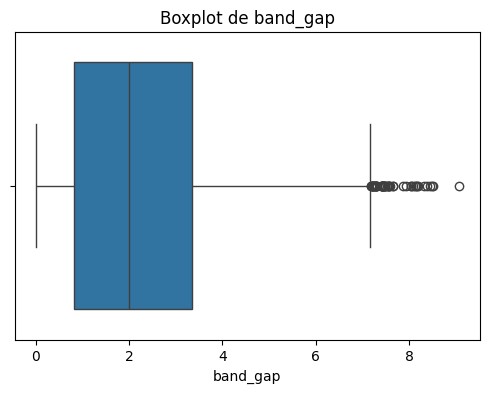

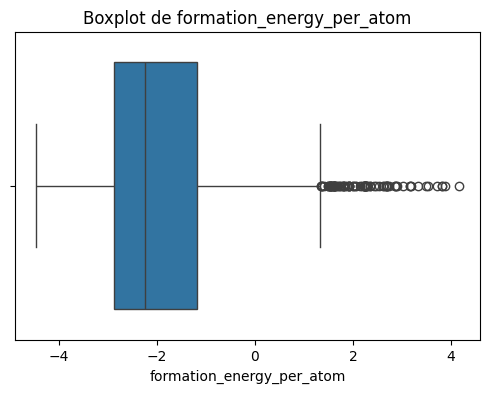

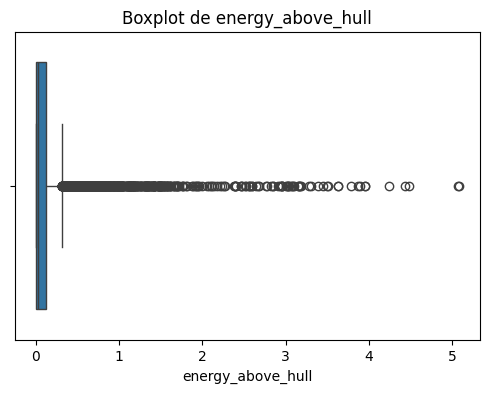

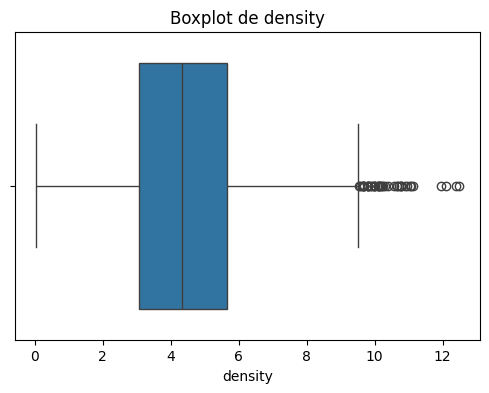

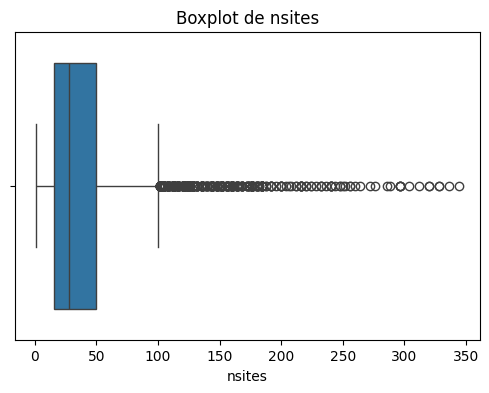

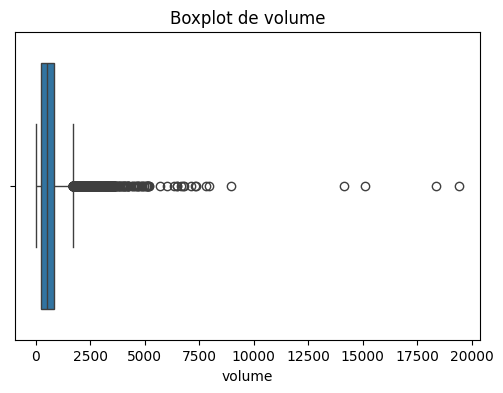

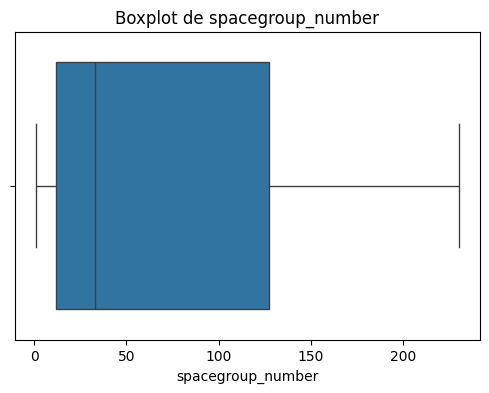

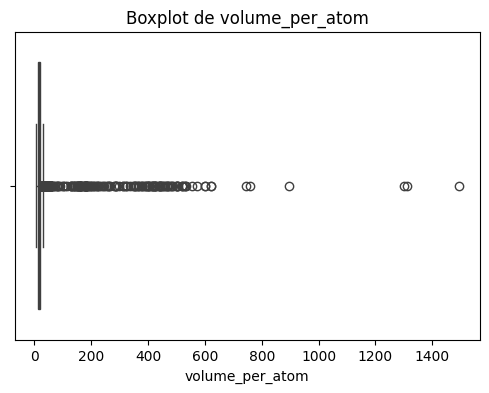

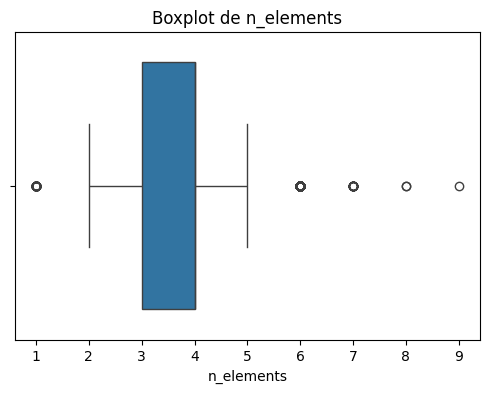

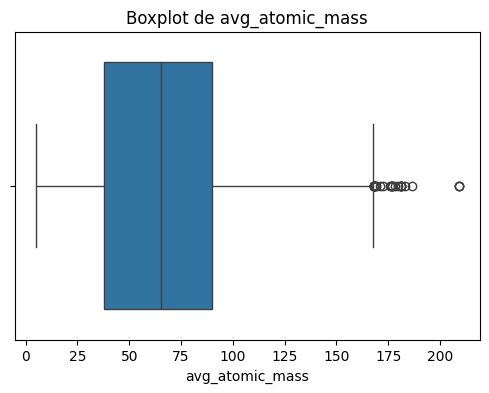

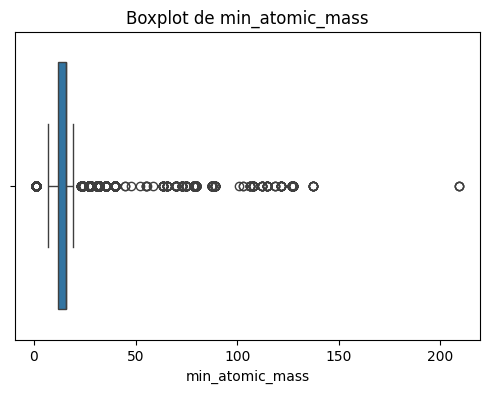

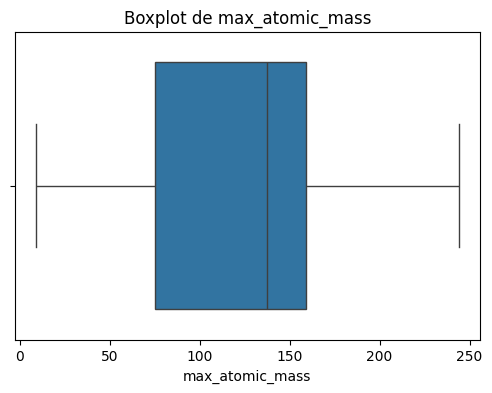

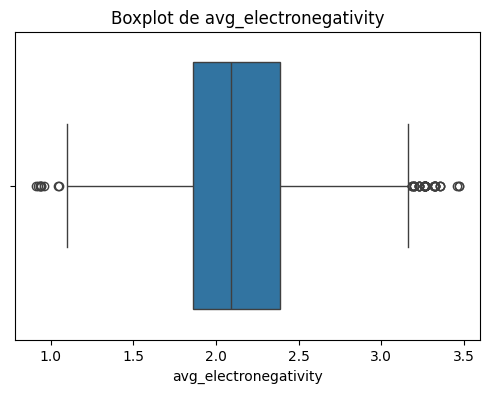

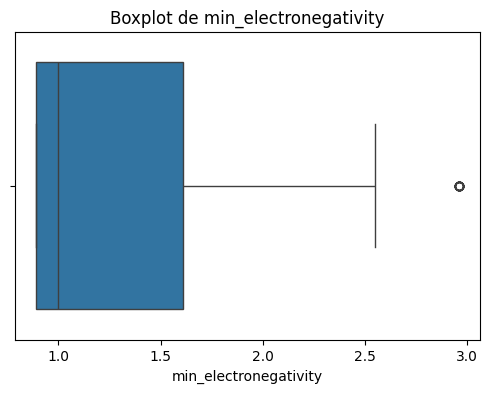

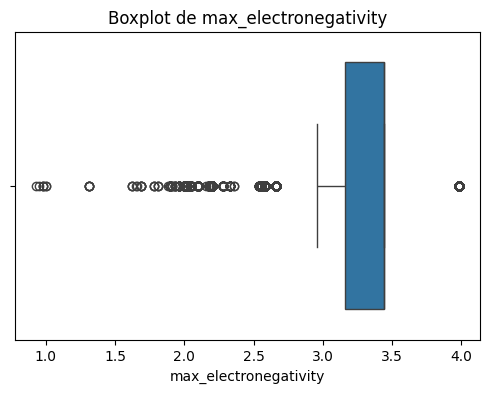

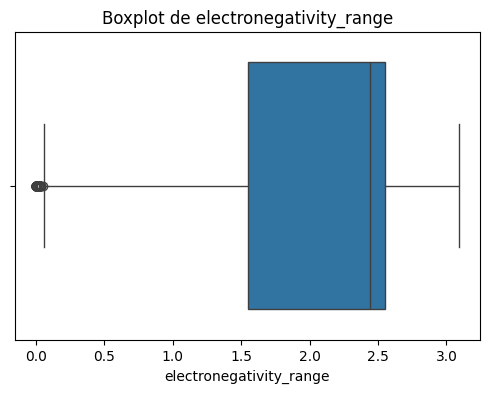

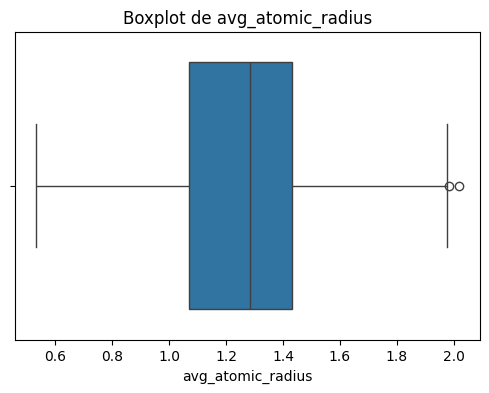

ValueError: List of boxplot statistics and `positions` values must have same the length

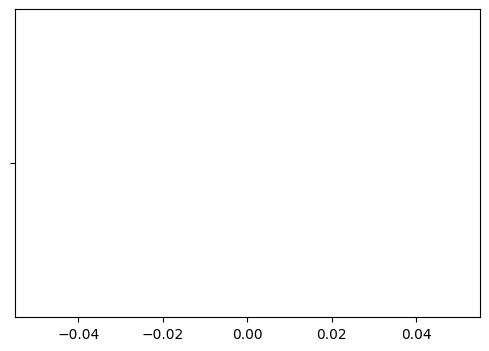

In [29]:
# ==============================
# 5. Análisis univariante
# ==============================

numeric_cols = df1.select_dtypes(include=np.number).columns.tolist()

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df1[col])
    plt.title(f"Boxplot de {col}")
    plt.xlabel(col)
    plt.show()

Columnas numéricas detectadas: ['band_gap', 'formation_energy_per_atom', 'energy_above_hull', 'density', 'nsites', 'volume', 'spacegroup_number', 'volume_per_atom', 'n_elements', 'avg_atomic_mass', 'min_atomic_mass', 'max_atomic_mass', 'avg_electronegativity', 'min_electronegativity', 'max_electronegativity', 'electronegativity_range', 'avg_atomic_radius', 'avg_ionic_radius']


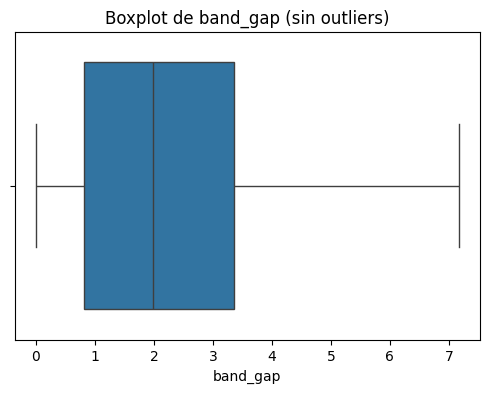

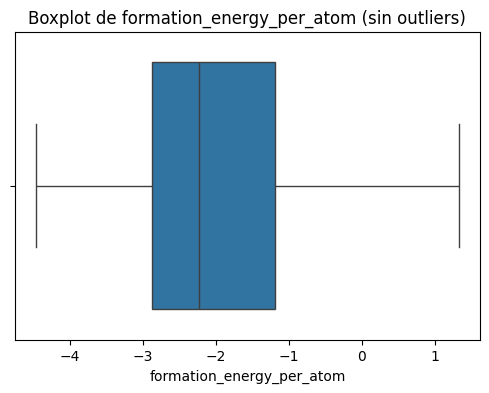

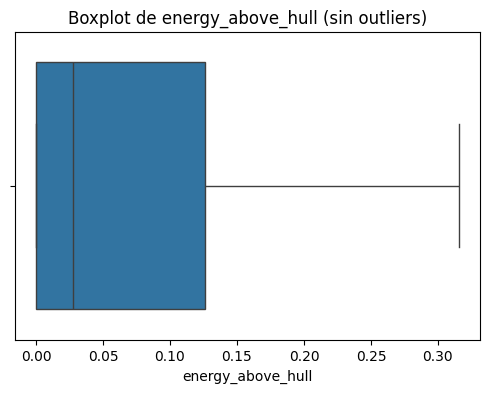

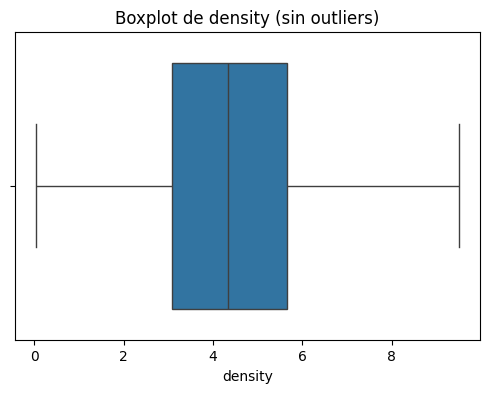

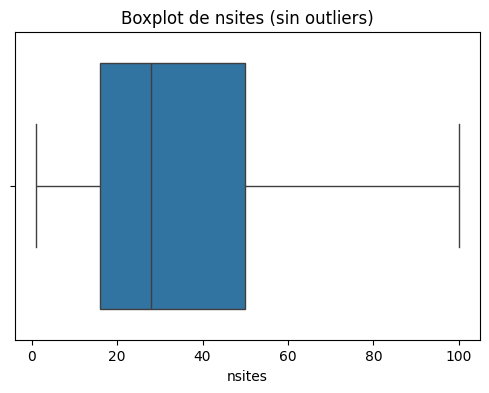

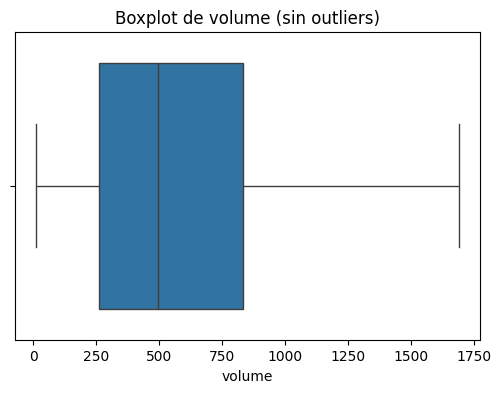

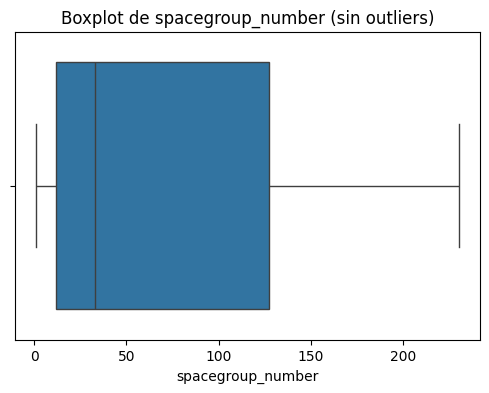

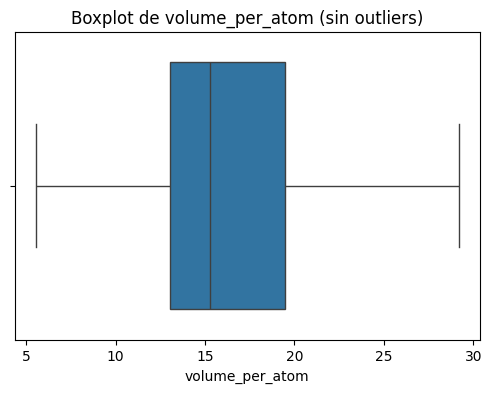

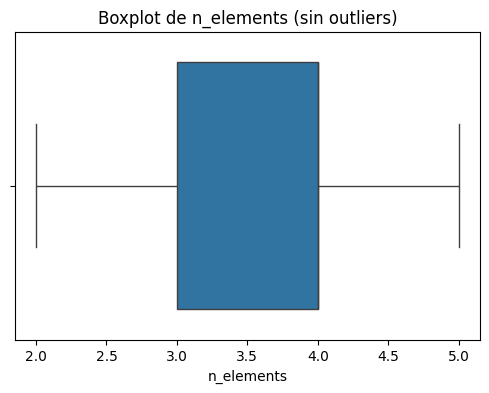

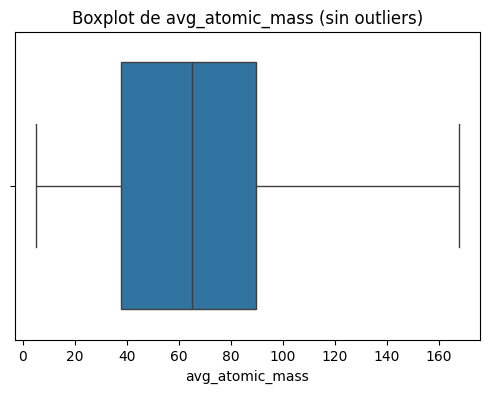

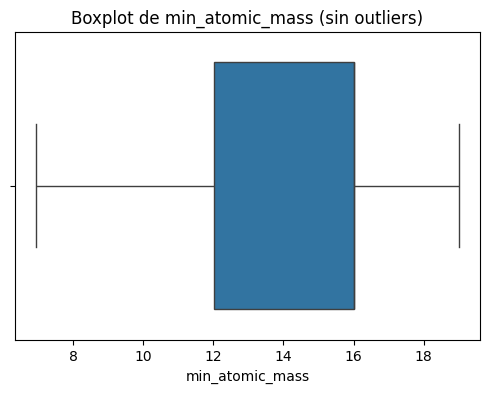

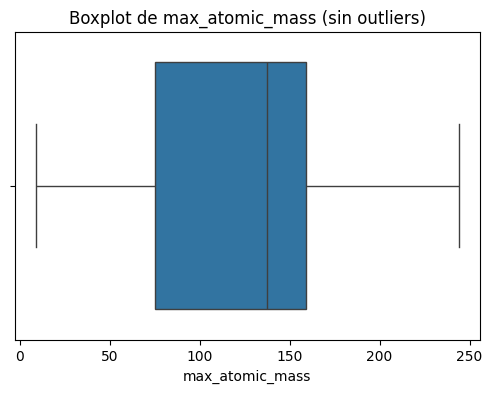

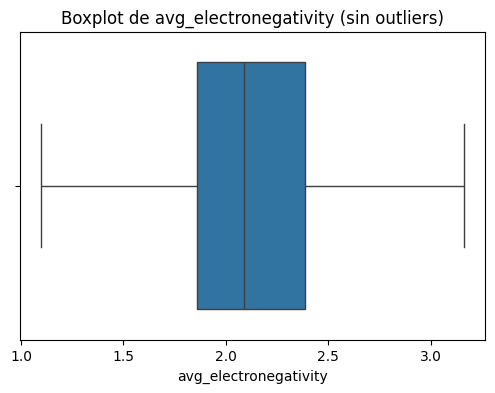

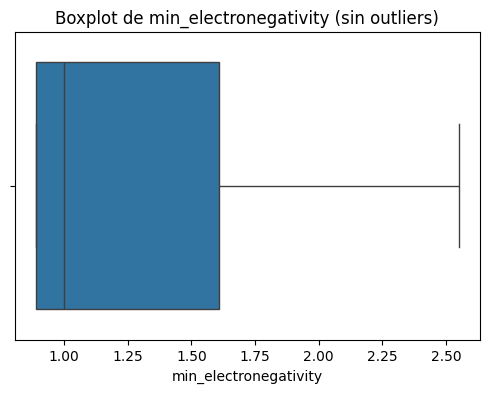

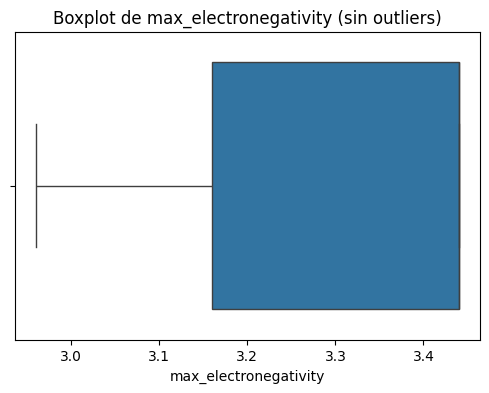

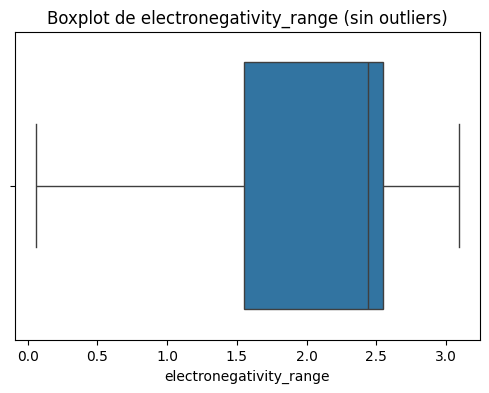

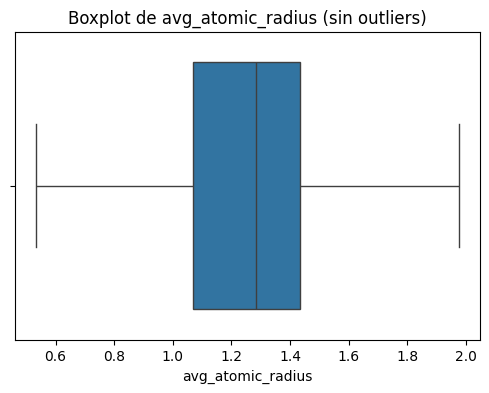

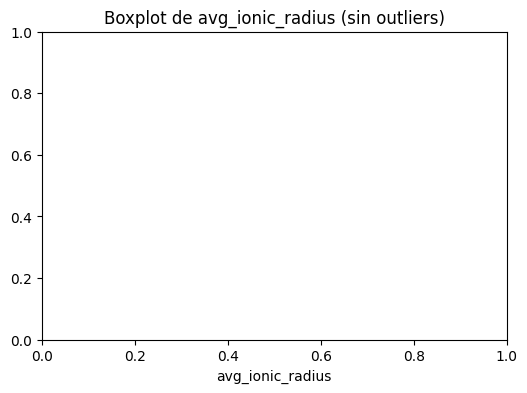

In [28]:
# ==============================
# Gráfico Boxplot sin outliers 
# ==============================

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Selección estricta de columnas numéricas
numeric_cols = df1.select_dtypes(include=[float, int]).columns.tolist()
print("Columnas numéricas detectadas:", numeric_cols)

# Loop para boxplots
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col].dropna(), showfliers=False)  # <- paso Serie limpia
    plt.title(f"Boxplot de {col} (sin outliers)")
    plt.xlabel(col)
    plt.show()


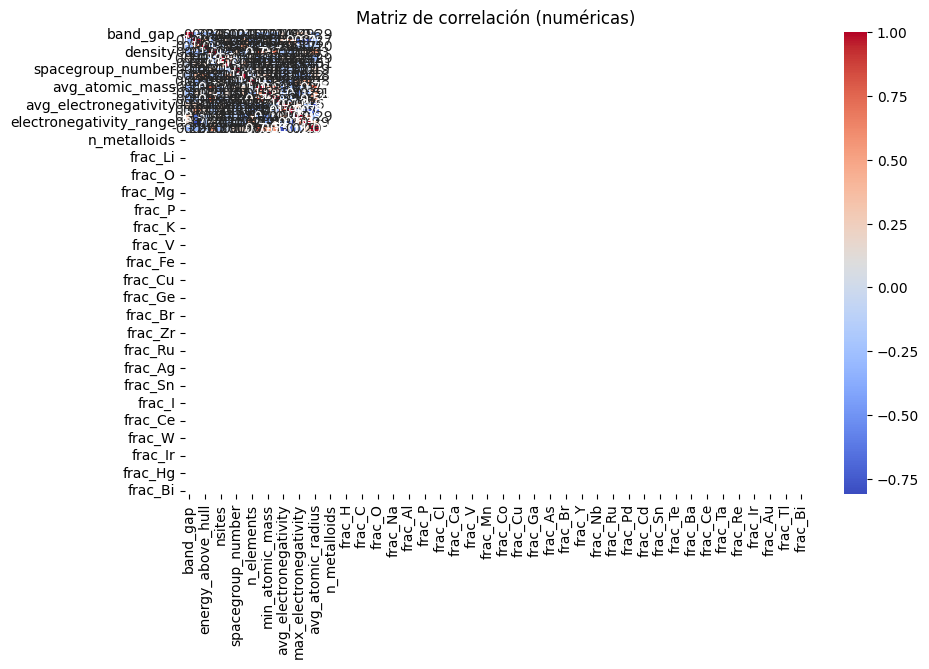

In [ ]:
#Cosas de codigo que no entiendo pero me da igual

numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns.tolist()
if "avg_ionic_radius" in numeric_cols:
    numeric_cols.remove("avg_ionic_radius")
corr = df[numeric_cols].corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación (numéricas)")
plt.show()


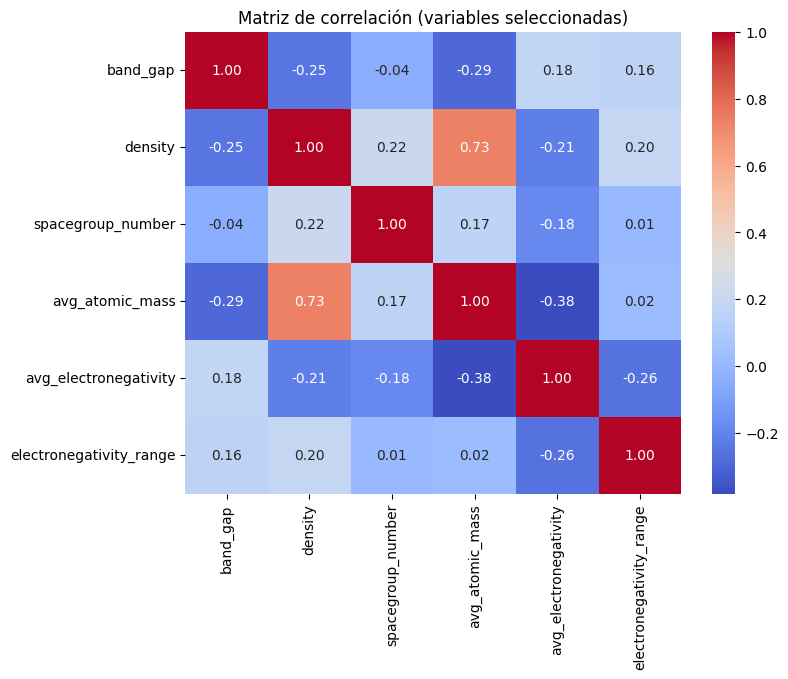

In [34]:
#Nos damos cuenta de que el resto no sirve de mucho 

# Lista de columnas relevantes (puede ajustarla según necesite)
selected_features = [
    "band_gap",
    "density",
    "spacegroup_number",
    "avg_atomic_mass",
    "avg_electronegativity",
    "electronegativity_range",
    
]

# Calcular correlación solo con esas
corr = df[selected_features].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación (variables seleccionadas)")
plt.show()

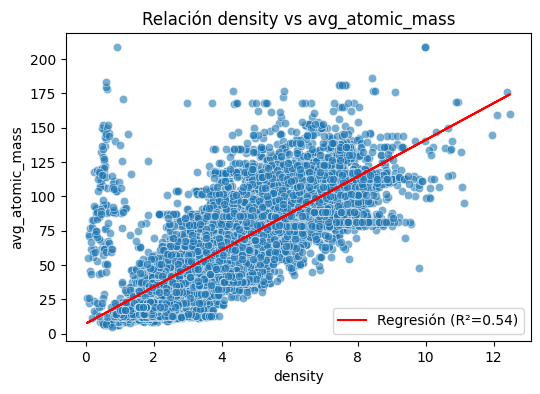

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

def scatter_with_regression(df, x_col, y_col):
    # Extraer variables y convertir a arrays
    X = df[[x_col]].dropna().values  # X debe ser 2D
    y = df[y_col].dropna().values    # y puede ser 1D

    # Ajustar modelo de regresión lineal
    model = LinearRegression()
    model.fit(X, y)

    # Predicciones
    y_pred = model.predict(X)

    # Calcular R²
    r2 = r2_score(y, y_pred)

    # Gráfico
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df[x_col], y=df[y_col], alpha=0.6)
    plt.plot(df[x_col], y_pred, color="red", label=f"Regresión (R²={r2:.2f})")
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f"Relación {x_col} vs {y_col}")
    plt.legend()
    plt.show()
    
scatter_with_regression(df, "density", "avg_atomic_mass")


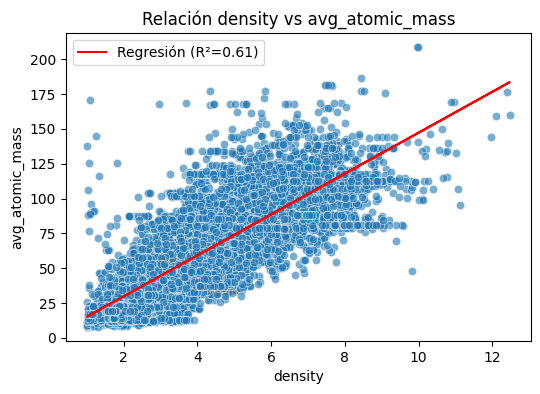

In [44]:
# Filtrar valores de densidad mayores a 1
df_filtered = df[df["density"] > 1]

# Ajustar de nuevo
scatter_with_regression(df_filtered, "density", "avg_atomic_mass")